# Project 8: Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

## Data import and first inspection 

In [1]:
#Import libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#Read in data from csv file / create dataframe df 
df = pd.read_csv("housing.csv")

In [3]:
#Explore data 
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Features:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean



In [4]:
#Inspect data and data types are correct 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- total_bedrooms has some missing values 

In [5]:
#Check missing values in total_bedroom column
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [6]:
#Check for duplicates
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [7]:
#Gather summary satistics about the data and non numeric columns 
df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [8]:
#Filter non numeric columns for describe 
df.describe(include = "O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [9]:
#Filter value counts for ocean_proximity 
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
#Filter total rooms_rooms value counts
df.total_rooms.value_counts()

1527.0    18
1613.0    17
1582.0    17
2127.0    16
1703.0    15
          ..
7784.0     1
7916.0     1
6859.0     1
6846.0     1
5639.0     1
Name: total_rooms, Length: 5926, dtype: int64

__Conclusion__ 

- Filtered data does not give clear representation of the data so far. Plot in histograph for better frst inspection.

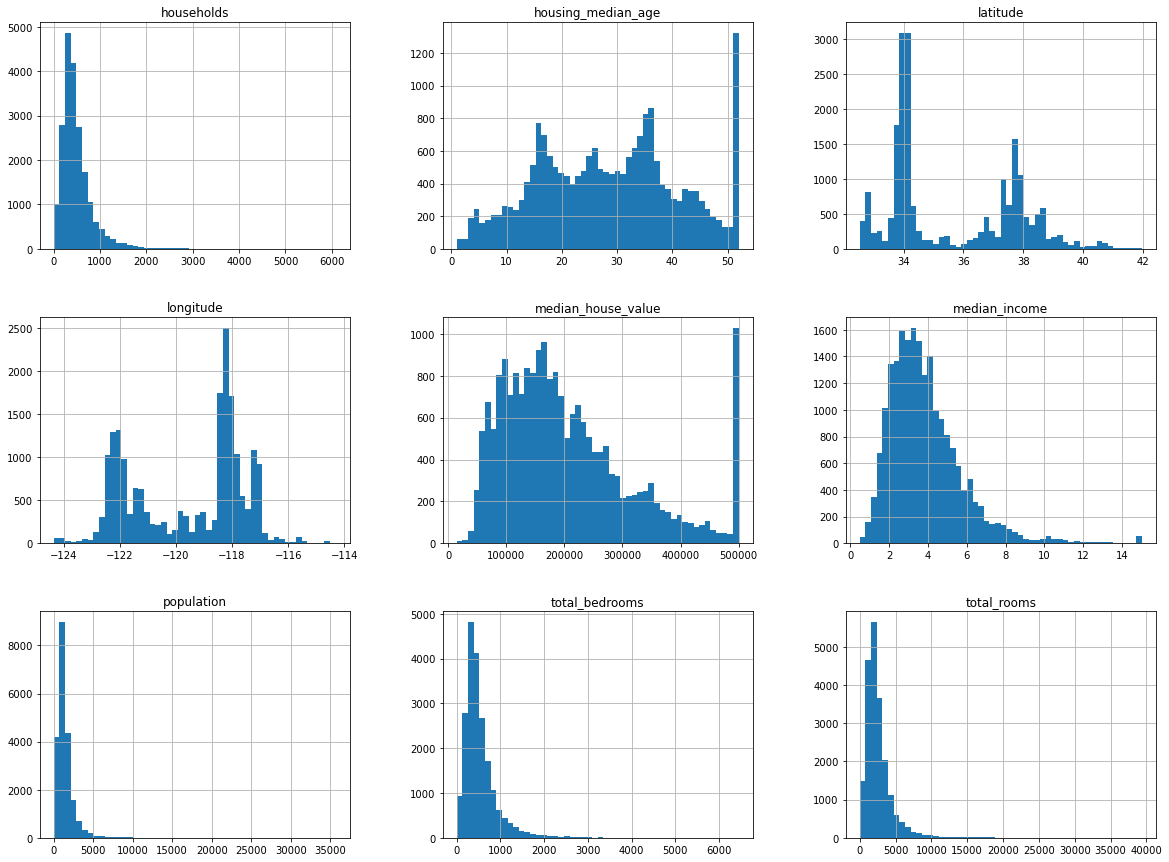

In [29]:
#Put data into histograph
df.hist(bins = 50, figsize=(20, 15))
plt.show()

# Data cleaning and creating additional Features 


In [11]:
#Inspect data to clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Total bedrooms is the only column missing values of 207 

- Drop the rows missing values  

In [12]:
df.dropna(inplace = True)

In [13]:
#check data again 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [14]:
df["rooms_per_household"] = df.total_rooms.div(df.households)

In [15]:
#Get largest values
df.rooms_per_household.nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [16]:
#Get lowest values
df.rooms_per_household.nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

# Consider points about data

- Do houses have less than 1 room? Is this data relevent to the purpose of the project?
- Remove extreme data values?
- Futher inspect those extreme values?

In [17]:
#Further inspect adnormal values 
df.loc[[1979, 5916, 8219]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889


Conclusion about data 

- total rooms  bedroom and household don't add up correctly.

In [18]:
#Population per house 
df["pop_per_household"] = df.population.div(df.households)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209


In [19]:
#How many bedrooms per rooms
df["bedrooms_per_rooms"] = df.total_bedrooms.div(df.total_rooms)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


In [20]:
#get summary statistics
df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_rooms
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433,20433.000000,20433.000000,20433.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9034,NaN,NaN,NaN
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,NaN,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,NaN,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,NaN,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,NaN,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,NaN,6.052381,3.281513,0.239821


Mean aggregate key points to acknowledge 

- Average household is 3.07 
- Average rooms are 5.43
- 0.21 bedrooms per room

# Which Factors Influence House Prices?

- Identify factors or features that influence house prices 

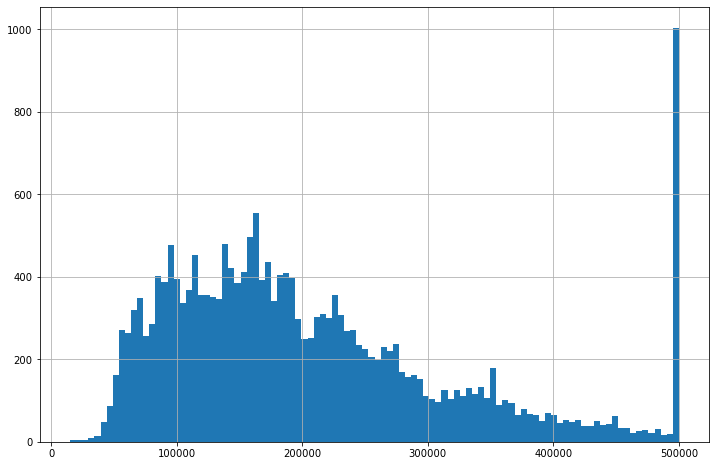

In [21]:
#Create bar graph
df.median_house_value.hist(bins = 100, figsize = (12, 8))
plt.show()

In [23]:
#Discover any correlations
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_rooms
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.027307,0.002304,0.092657
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.106423,0.002522,-0.113815
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.153031,0.013258,0.136089
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.133482,-0.024596,-0.187900
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,-0.028355,0.084238
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.071898,0.070062,0.035319
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.080165,-0.027336,0.065087
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.325307,0.018894,-0.615661
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.151344,-0.023639,-0.255880
rooms_per_household,-0.027307,0.106423,-0.153031,0.133482,0.001538,-0.071898,-0.080165,0.325307,0.151344,1.000000,-0.004873,-0.416952


In [25]:
#Filter data corr for median housing value 
df.corr().median_house_value.sort_values(ascending = False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_household     -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_rooms    -0.255880
Name: median_house_value, dtype: float64

__Conclusion__ 

Positive correlations between the following:

- Higher the income / higher the housing value 
- Rooms per household / house prices (larger the house higher the price)
- Median housing age / larger districts 

Weak or no correlation(no linear) between the following:

 - house price and household 
 - population / longitude 
 
Negative correlation 

- bedrooms per room (more non bedrooms per household)

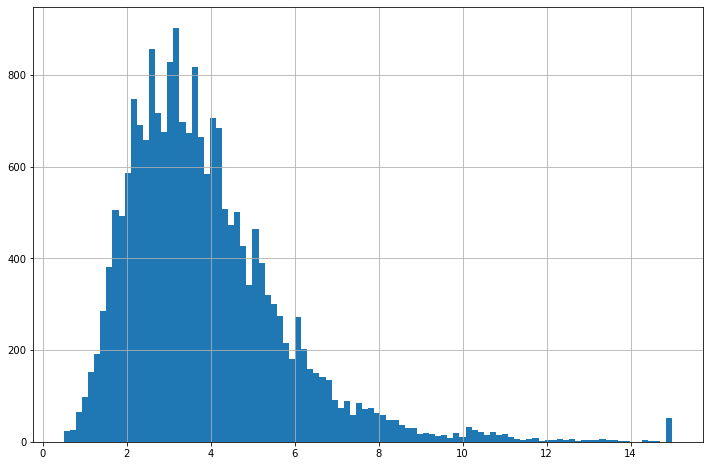

In [27]:
#Plot in histogram
df.median_income.hist(bins = 100, figsize = (12, 8))
plt.show()

- Median income between 2 to 4 

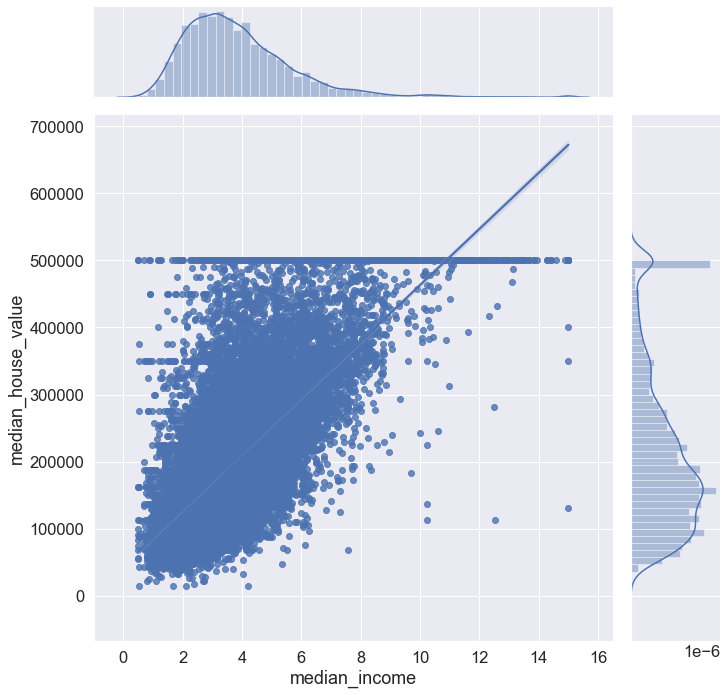

In [29]:
#Plot regression plot line/ seaborn joint plot
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "reg", height = 10)
plt.show()

 - higher the income / higher the house value 

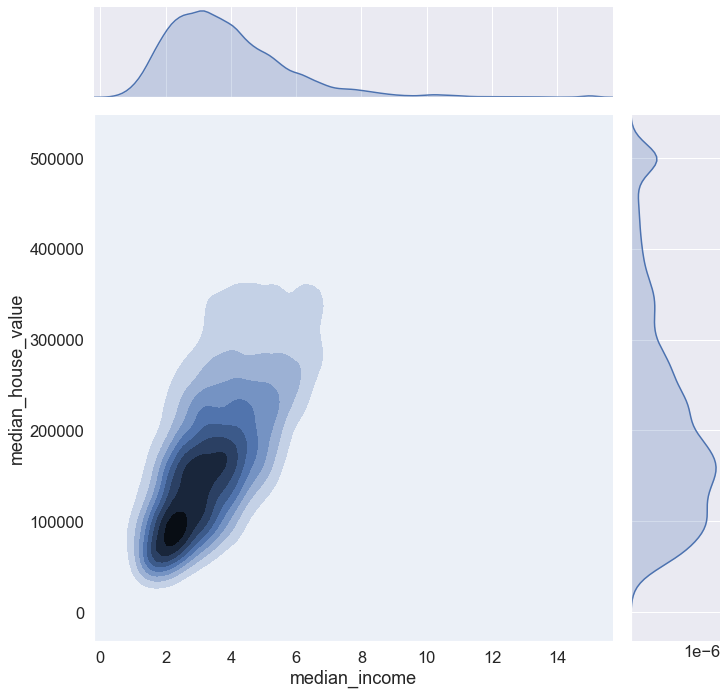

In [33]:
#Plot density graph
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "kde", height  = 10 )
plt.show()

 - Highest density 2 for median income / 100,000 for housing value  

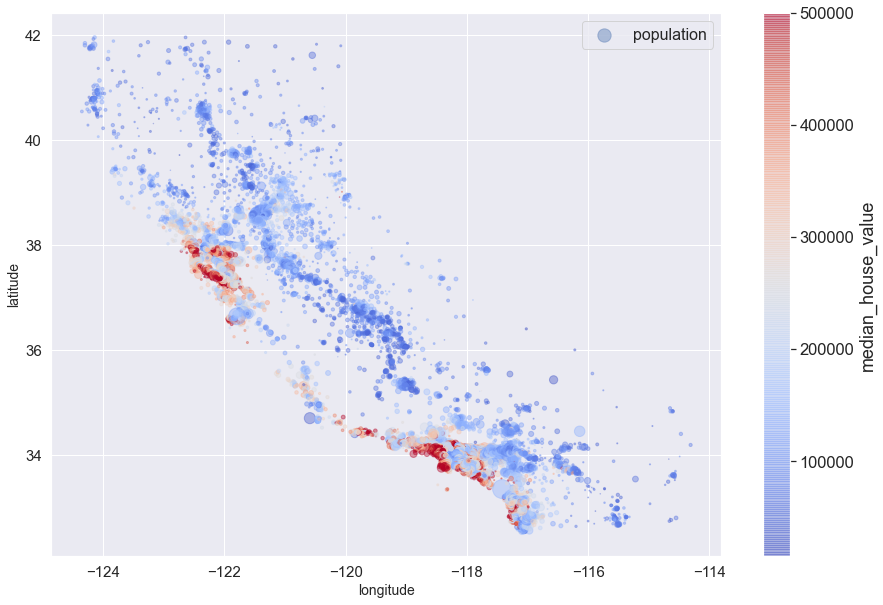

In [32]:
#Plot scatter graph
df.plot(kind = "scatter", x = "longitude", y ="latitude",
       s=df.population/100, label="population", figsize = (15, 10),
       c="median_house_value", cmap="coolwarm",
       colorbar= True, alpha=0.4, fontsize = 15, sharex = False)
plt.ylabel("latitude", fontsize = 14)
plt.xlabel("longitude", fontsize = 14)
plt.legend(fontsize=16)

__Conclusion From Scatter Graph__ (Shape represents California) 

This density graph represents the highest amount of population in relations to housing prices and area. This could mean larger cities for more housing. Higher the deman for housing the more expensive the district. 

- Highest density of housing is 100,000(MHV) / longitude of 118 & latitiude of 34
- Second highest density is 280,000(MHV) / longitude of 122 & latitiude of 37.5

In [6]:
#Import California image map to further cross reference 
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")
california_img

array([[[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667]],

       [[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667]],

       [[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667]],

       ...,

       [[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.8274

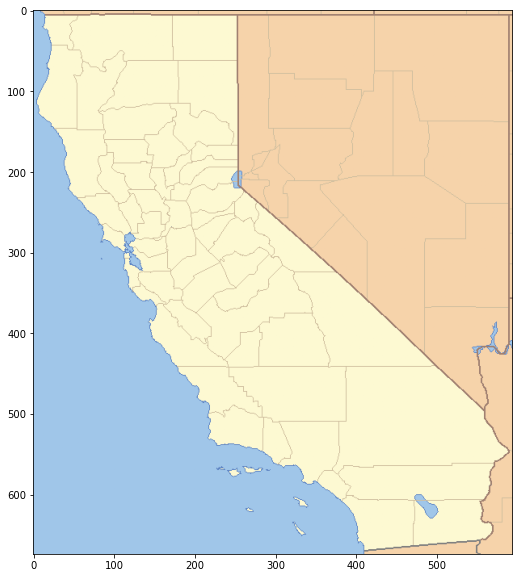

In [7]:
#use plt.show to display the image 
plt.figure(figsize = (15, 10))
plt.imshow(california_img)
plt.show()

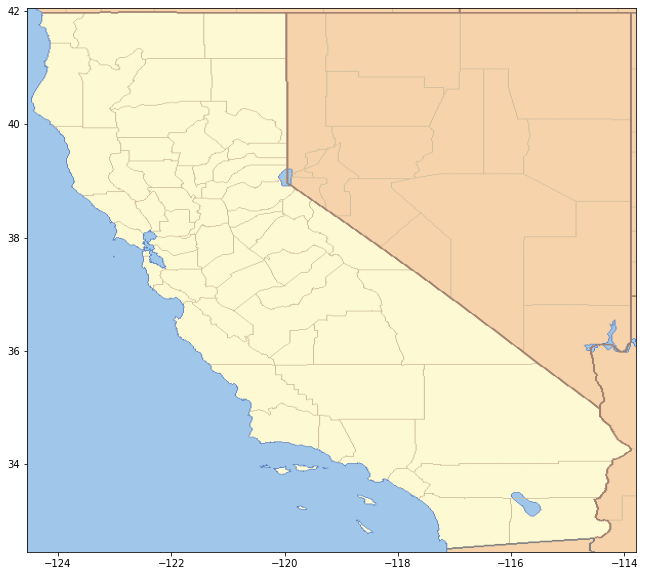

In [8]:
#Modify image to show longitude and latitude to cross referene population density 
plt.figure(figsize = (15, 10))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

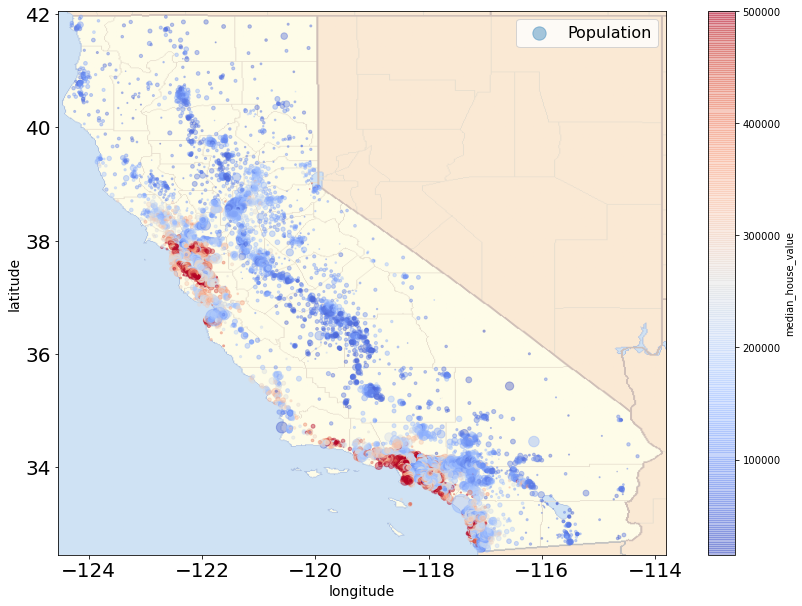

In [17]:
# Merge density graph and map of California
df.plot(kind = "scatter", x = "longitude", y = "latitude",
       s=df.population/100, label="Population", figsize = (15, 10),
       c="median_house_value", cmap="coolwarm",
       colorbar=True, alpha=0.4, fontsize = 20, sharex = False)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
          cmap=plt.get_cmap("jet"))

plt.ylabel("latitude", fontsize = 14)
plt.xlabel("longitude", fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

__Conclusion from map and density graph__

Two major areas with highest density San Fransisco and L.A.

- Highest density closest to the ocean / ocean proximity influences housing prices and density 
- Standard of beach influences demand / demand for housing increases near ocean access

In [18]:
#Proximity 
prox = df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [24]:
#plot scatter graph to show proximity to ocean 
df_loc = df[df.ocean_proximity == prox[1]].copy()

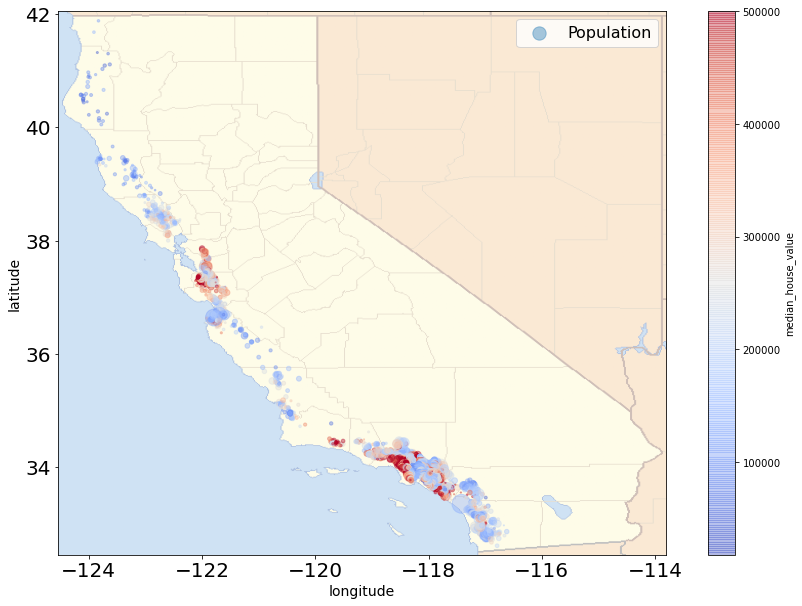

In [25]:
df_loc.plot(kind = "scatter", x="longitude", y="latitude",
           s=df_loc["population"]/100, label="Population", figsize = (15, 10),
           c="median_house_value", cmap="coolwarm",
           colorbar=True, alpha=0.4, fontsize = 20, sharex = False)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.5,
          cmap=plt.get_cmap("jet"))

plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

# Advanced Data Analysis with Seaborn 

In [28]:
#Re-examine data
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


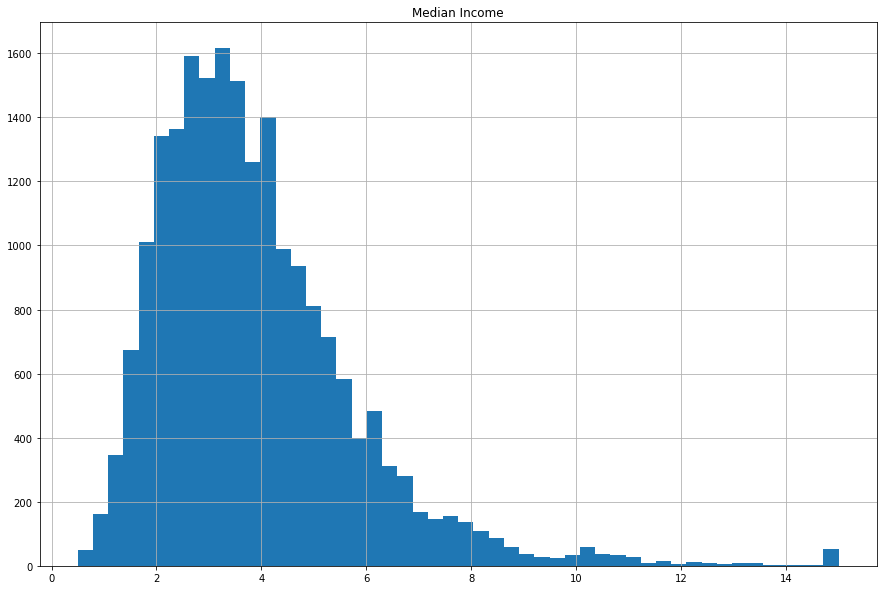

In [30]:
#Income is a key factor that influences housing prices 
df.median_income.hist(bins=50, figsize=(15,10))
plt.title("Median Income")
plt.show()

In [31]:
#Use qcut method to analyze data further 
pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.743, 7.3]
3          (4.743, 7.3]
4        (3.535, 4.743]
              ...      
20635    (0.499, 2.563]
20636    (0.499, 2.563]
20637    (0.499, 2.563]
20638    (0.499, 2.563]
20639    (0.499, 2.563]
Name: median_income, Length: 20640, dtype: category
Categories (5, interval[float64]): [(0.499, 2.563] < (2.563, 3.535] < (3.535, 4.743] < (4.743, 7.3] < (7.3, 15.0]]

In [21]:
#Change labels to better represent data percentiles 
df["income_ct"] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                          labels = ["low", "below average", "above average", "high", "very high"])

In [22]:
df.income_ct

0            very high
1            very high
2                 high
3                 high
4        above average
             ...      
20635              low
20636              low
20637              low
20638              low
20639              low
Name: income_ct, Length: 20640, dtype: category
Categories (5, object): [low < below average < above average < high < very high]

In [38]:
df.income_ct.value_counts(normalize = True)

above average    0.25
below average    0.25
low              0.25
high             0.20
very high        0.05
Name: income_ct, dtype: float64

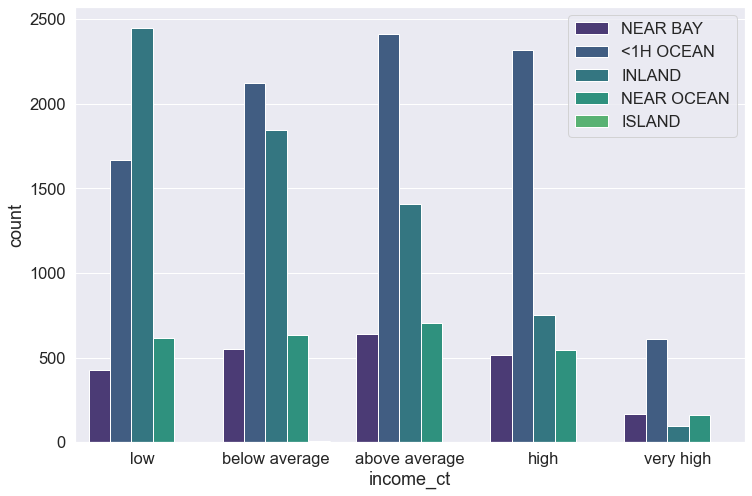

In [40]:
#Plot graph for income_ct / ocean_proximity
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette="viridis")
sns.countplot(data = df, x = "income_ct", hue = "ocean_proximity")
plt.legend(loc=1)
plt.show()

__Conclusion From Data__

- Low  = Highest inland proximity / lowest NEAR BAY

- below average = Highest <1H ocean proximity / Increase in NEAR BAY and NEAR BAY 

- above average = Highest <1H ocean proximity / Increase in NEAR BAY and NEAR BAY 

- high = Highest <1H ocean proximity / Reduced in NEAR BAY and NEAR BAY

- very high = Highest <1H ocean proximity / Lowest INLAND

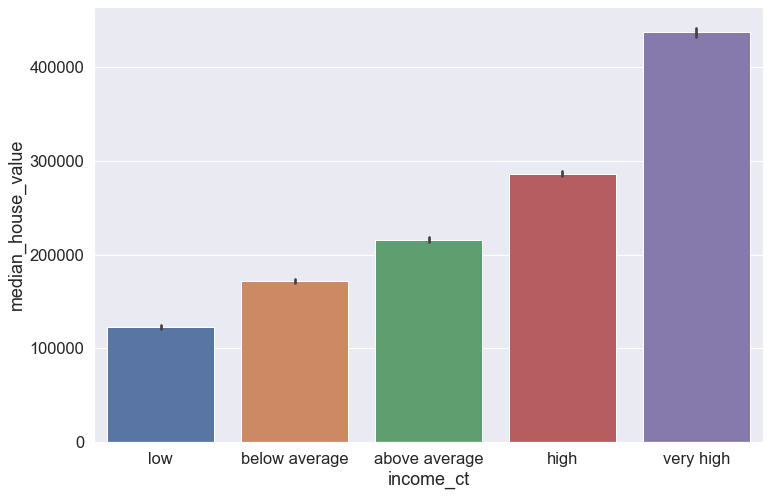

In [41]:
#Income_ct / median_house_value
plt.figure(figsize = (12, 8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "income_ct", y = "median_house_value", dodge = True)
plt.show()

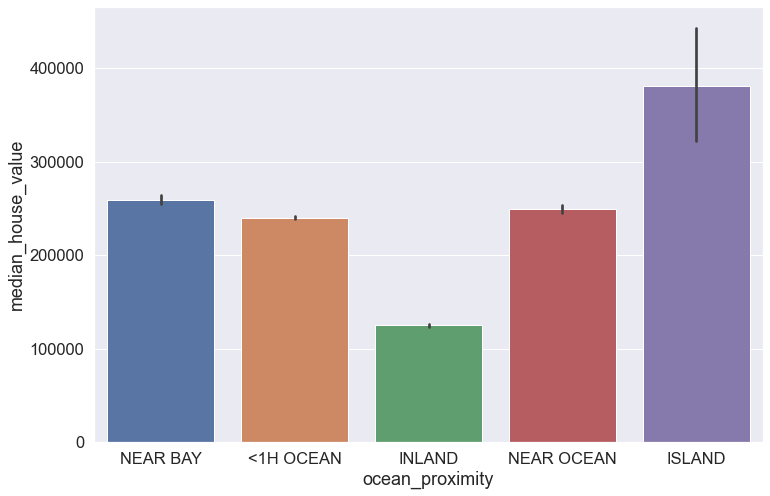

In [42]:
#Ocean_proximity / median_house_values
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.5)
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value", dodge = True)
plt.show()

In [45]:
#Groupby income_ct and ocean_proximity / drop island 
matrix = df.groupby(["income_ct", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])

In [47]:
#Floats to integers 
matrix.astype("int")

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_ct,,,,
low,161308,84769,155709,148132
below average,196903,115214,220160,209471
above average,231999,147710,261706,255610
high,292114,207970,321968,337934
very high,439648,346034,451015,468739


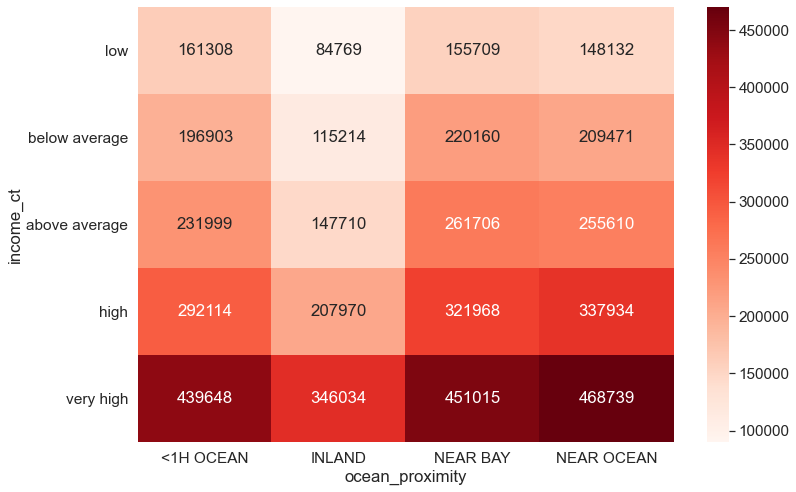

In [48]:
#Put data in a heat map
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix.astype("int"), cmap = "Reds", annot = True, fmt = "d", vmin = 90000, vmax = 470000)
plt.show()

__Conclusion From Data__

- High income and high housing values correlate / NEAR OCEAN has the highest housing prices 

- Low income and low income housing values correlate / INLAND has the lowest housing prices 

- No significant difference between <1H OCEAN and INLAND for housing values for low income 



# Part 2 - Use the data to create Future Engineering for Machine Learning

- Transform some features 
- Separate features and labels 
- Convert text/categorical data into numerical data

In [5]:
#Median house value copy
label = df.median_house_value.copy()
label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [8]:
#Drop median house values from label
features = df.drop(columns = ["median_house_value"])
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


- Typically numeric features have very different scales / normalize numeric features 
- Each machine learning has its own pros and cons if you normalize numeric features 

In [10]:
features.select_dtypes("float")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [11]:
#Import scipy for statistical library
import scipy.stats as stats 

In [12]:
feat1 = features.select_dtypes("float").apply(lambda x: stats.zscore(x))
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-0.804819,NaN,-0.974429,-0.977033,2.344766
1,-1.322844,1.043185,-0.607019,2.045890,NaN,0.861439,1.669961,2.332238
2,-1.332827,1.038503,1.856182,-0.535746,NaN,-0.820777,-0.843637,1.782699
3,-1.337818,1.038503,1.856182,-0.624215,NaN,-0.766028,-0.733781,0.932968
4,-1.337818,1.038503,1.856182,-0.462404,NaN,-0.759847,-0.629157,-0.012881
...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,NaN,-0.512592,-0.443449,-1.216128
20636,-0.818722,1.806329,-0.845393,-0.888704,NaN,-0.944405,-1.008420,-0.691593
20637,-0.823713,1.778237,-0.924851,-0.174995,NaN,-0.369537,-0.174042,-1.142593
20638,-0.873626,1.778237,-0.845393,-0.355600,NaN,-0.604429,-0.393753,-1.054583


In [13]:
#Display only 2 decimals for floats
pd.options.display.float_format = "{:.2f}".format

In [14]:
#Calculate standard deviation 
feat1.agg(["mean", "std"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
mean,-0.00,0.00,0.00,0.00,nan,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,nan,1.00,1.00,1.00


# Convert text data into numbers for Mchine Learning  

- Typically Machine Learning cannot convert text/categorical data into numbers 

In [16]:
#Explore ocean_proximity
df.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [17]:
features.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- 5 categorical features 

In [19]:
# Use dummies variables to convert the 5 categorical features (changes to binary code)  
dummies = pd.get_dummies(features.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


- Extract 1 column or can cause a multi co-linearity problem 

In [24]:
#concat columns 
features = pd.concat([feat1, dummies, df.income_ct], axis = 1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_ct
0,-1.33,1.05,0.98,-0.80,nan,-0.97,-0.98,2.34,0,0,0,1,0,very high
1,-1.32,1.04,-0.61,2.05,nan,0.86,1.67,2.33,0,0,0,1,0,very high
2,-1.33,1.04,1.86,-0.54,nan,-0.82,-0.84,1.78,0,0,0,1,0,high
3,-1.34,1.04,1.86,-0.62,nan,-0.77,-0.73,0.93,0,0,0,1,0,high
4,-1.34,1.04,1.86,-0.46,nan,-0.76,-0.63,-0.01,0,0,0,1,0,above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,nan,-0.51,-0.44,-1.22,0,1,0,0,0,low
20636,-0.82,1.81,-0.85,-0.89,nan,-0.94,-1.01,-0.69,0,1,0,0,0,low
20637,-0.82,1.78,-0.92,-0.17,nan,-0.37,-0.17,-1.14,0,1,0,0,0,low
20638,-0.87,1.78,-0.85,-0.36,nan,-0.60,-0.39,-1.05,0,1,0,0,0,low


- Standardized numerical columns
- Dummy features 
- Income catergories 